In [1]:
import altair as alt
import requests

In [2]:
data = 'https://tsws.hkvservices.nl/mangrove.ws/entry.asmx/Call?function=ci.appfunctions.GetSectionById&parameters=%7Bid:43001001,%20momentid:0%7D'

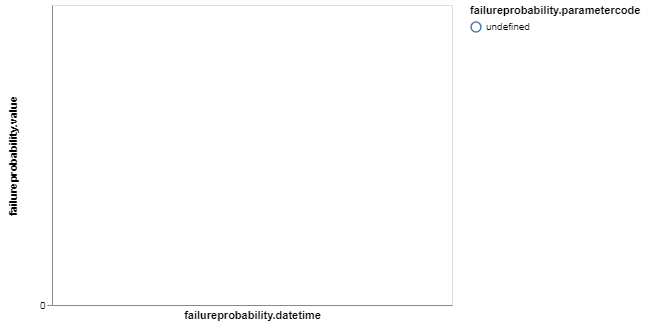

In [3]:
alt.Chart(data).mark_line().encode(
    x=alt.X(field='failureprobability.datetime', type='temporal'),
    y=alt.Y(field='failureprobability.value', type='quantitative'),
    color=alt.Color(field='failureprobability.parametercode', type='nominal')
)

In [8]:
data_url = "https://tsws.hkvservices.nl/mangrove.ws/entry.asmx/Call?function=ci.db.Data&parameters=%7bsource:%22measuringstation%22%7d"
chart = alt.Chart(data_url).mark_line().encode(
    x = alt.X('datetime:T', axis = alt.Axis(format = '%Y-%m-%d %H:%M')), # datetime
    y = alt.Y('value:Q', scale = alt.Scale(zero = False)),
    color = 'parameter_code:N',
    row = 'name:N'
).transform_filter(
    alt.datum.name == 'Amerongen boven' 
)


In [9]:
print(chart.to_json()

'{\n  "$schema": "https://vega.github.io/schema/vega-lite/v2.6.0.json",\n  "config": {\n    "view": {\n      "height": 300,\n      "width": 400\n    }\n  },\n  "data": {\n    "url": "https://tsws.hkvservices.nl/mangrove.ws/entry.asmx/Call?function=ci.db.Data&parameters=%7bsource:%22measuringstation%22%7d"\n  },\n  "encoding": {\n    "color": {\n      "field": "parameter_code",\n      "type": "nominal"\n    },\n    "row": {\n      "field": "name",\n      "type": "nominal"\n    },\n    "x": {\n      "axis": {\n        "format": "%Y-%m-%d %H:%M"\n      },\n      "field": "datetime",\n      "type": "temporal"\n    },\n    "y": {\n      "field": "value",\n      "scale": {\n        "zero": false\n      },\n      "type": "quantitative"\n    }\n  },\n  "mark": "line",\n  "transform": [\n    {\n      "filter": "(datum.name === \'Amerongen boven\')"\n    }\n  ]\n}'

In [5]:
import pandas as pd

In [6]:
r = requests.get("https://tsws.hkvservices.nl/mangrove.ws/entry.asmx/Call?function=ci.db.Data&parameters=%7bsource:%22measuringstation%22%7d")

In [7]:
pd.read_json(r.json())

ValueError: Invalid file path or buffer object type: <class 'list'>

In [20]:
df = pd.DataFrame.from_records(r.json())

In [21]:
df.head()

,code,date,datetime,momentid,name,parameter_code,parameter_name,parameter_unit,value
0,AMRO,2018-11-19T10:40:00,1.542624e+12,0,Amerongen beneden,H10,Gemeten waterstand,m+NAP,1.89
1,AMRB,2018-11-19T10:40:00,1.542624e+12,0,Amerongen boven,H10,Gemeten waterstand,m+NAP,6.04
2,ARNH,2018-11-19T10:40:00,1.542624e+12,0,Arnhem,H10,Gemeten waterstand,m+NAP,6.19
3,BORD,2018-11-19T10:40:00,1.542624e+12,0,Borgharen dorp,H10,Gemeten waterstand,m+NAP,38.28
4,CULB,2018-11-19T10:40:00,1.542624e+12,0,Culemborg brug,H10,Gemeten waterstand,m+NAP,1.95


['AMRO',
 'AMRB',
 'ARNH',
 'BORD',
 'CULB',
 'DRIO',
 'DRIB',
 'HAGB',
 'HOEK',
 'IJSS',
 'LOBI',
 'NIJM',
 'PANN',
 'TIEW',
 'VURE',
 'WERK',
 'ZALT',
 'DODE']

In [24]:
import json

In [27]:
json.dumps(df.code.unique().tolist())

'["AMRO", "AMRB", "ARNH", "BORD", "CULB", "DRIO", "DRIB", "HAGB", "HOEK", "IJSS", "LOBI", "NIJM", "PANN", "TIEW", "VURE", "WERK", "ZALT", "DODE"]'